# MEDICAL COST PERSONAL DATASET
**INSURANCE ANALYSIS**

Data from: https://www.kaggle.com/mirichoi0218/insurance

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees.

***GOAL*** 

No one plans to get sick or hurt, but most people need medical care at some point. Health insurance covers these costs and offers many other important benefits. Health insurance protects you from unexpected, high medical costs. You pay less for covered in-network health care, even before you meet your deductible.

Health insurance provides access to and financial protection against medical costs in the event of an accident, injury or diagnosis of a chronic illness that requires ongoing treatment by a specialist. Medical coverage also protects individuals who need immediate care for a broken leg, stroke or heart attack.

In my analysis I have the following **goals**
1. Identify what makes health insurance cost high in order to help insurance company decide who should pay higher premium
2. Predicting how smoker and gender drive health insurance income generation by using t-test.



**IMPORTING THE DATA** 

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Capstone3.csv to Capstone3.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Capstone3.csv']))

In [ ]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

**DATA EXPLORATION**

Take look at the first few rows

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

**CHECKING NULLS**

I'm checking the number of missing values and it shows no missing values in the data.

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
# Count the number of unique values in this column
df['bmi'].nunique()

548

**DESCRIPTIVE STATISTICS**

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**BOXPLOT**

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
     
- Tell you the values of your outlier
- Identify if data is symmetrical
- determine how tightly data is grouped
- See if your data is skewed


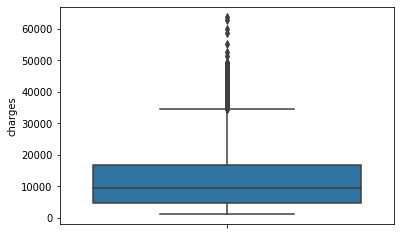

In [ ]:
sns.boxplot(y="charges", data=df)

Histogram can help quickly analyze a variable's distribution. The distribution here is not very skewed. It's good enough for the following analysis.

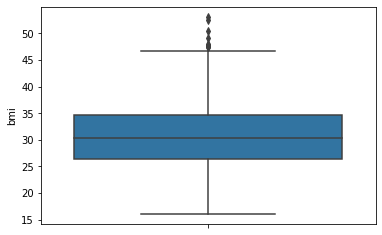

In [ ]:
sns.boxplot(y="bmi",   data=df)

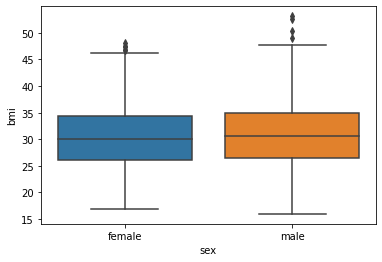

In [ ]:
sns.boxplot(y="bmi", x="sex", data=df)

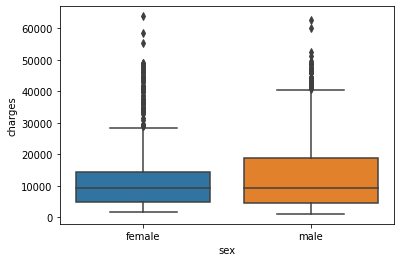

In [ ]:
sns.boxplot(y="charges", x="sex", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


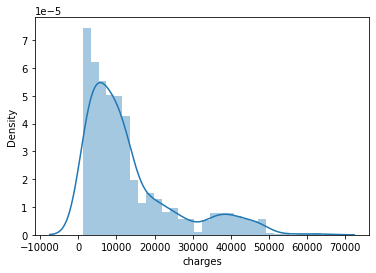

In [ ]:
ax = sns.distplot(df['charges'])

**CORRELATIONS**

**SCATTERPLOT**

The closer the data points come to forming a straight line when plotted, the higher the correlation between the two variables, or the stronger the relationship. From the scatter plots, charges seem to increase when bmi increase but the correlation seems to be week.

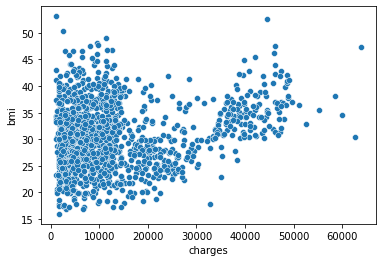

In [ ]:
sns.scatterplot(x="bmi", y="charges", data=df)

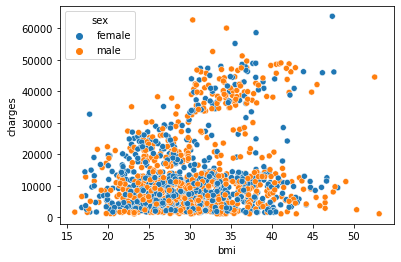

In [ ]:
sns.scatterplot(x="bmi", y="charges", hue="sex", data=df)

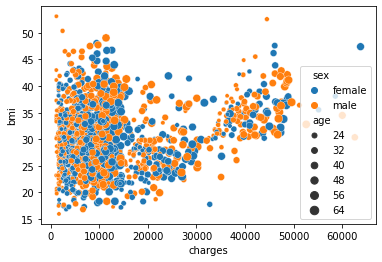

In [ ]:
sns.scatterplot(x="charges", y="bmi", hue="sex", size="age",  data=df)

**JOINTPLOT**

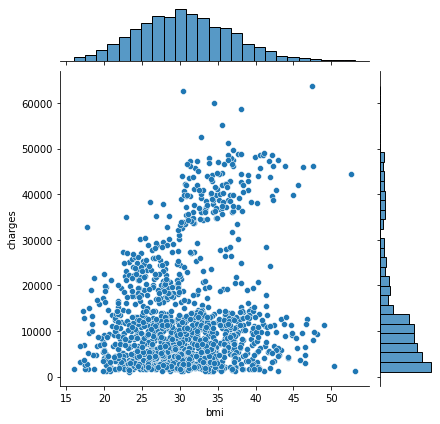

In [ ]:
sns.jointplot(x="bmi", y="charges", data=df)

**PAIRPLOT**

 A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python!

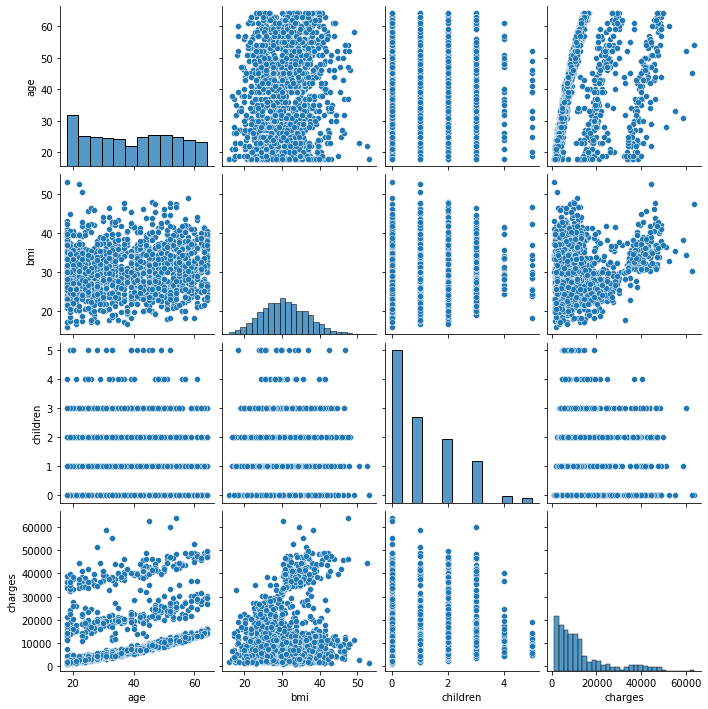

In [ ]:
sns.pairplot(df)

Let's run corr() to check further.

In [ ]:
df[['age', 'bmi', 'charges']].corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


In [ ]:
df.corr(method ='pearson')

,age,bmi,children,charges
age,1.000000,0.145145,0.042733,0.111078
bmi,0.145145,1.000000,0.084390,0.674272
children,0.042733,0.084390,1.000000,-0.101424
charges,0.111078,0.674272,-0.101424,1.000000


From this table, you can see that the correlation coefficient between the USD charges and the number of bmi is 0.67, which implies that there is some positive correlation between these two columns, This bears out as you might expect: as the number of bmi increases, the amount of the charges will also increases. 

From this table, you can see that the correlation coefficient between the USD ages and the number of charges is 0.11, which implies that there is some positive correlation between these two columns, This bears out as you might expect: when age increases, the amount of the charges will also increases.

**PEARSONR CORRELATIONS**

In [ ]:
stats.pearsonr(df['bmi'], df['charges'])

(0.1983409688336288, 2.459085535117846e-13)

In [ ]:
stats.pearsonr(df['age'], df['charges'])

(0.2990081933306476, 4.8866933317203816e-29)

From this, we can expect a significant correlation between these two variables to generalize out to the population. 


In [ ]:
tc,pc=stats.pearsonr(df['age'], df['charges'])
print(pc)

4.8866933317203816e-29


From this, we can expect a significant correlation between these two variables to generalize out to the population.



**T-TEST ONE**  

**HYPOTHESES ONE**

Ho : The charges between smoker and non smoker not difference

Ha : The charges between smoker and non smoker have difference

In [5]:
charges_smoker = df.iloc[(df['smoker'] == 'yes').values]
charges_nonsmoker = df.iloc[(df['smoker'] == 'no').values]

In [46]:
#if need to select more than two values
#charges_test = df.iloc[df['smoker'].isin(['no', 'yes']).values]

In [47]:
charges_test.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#equal_var: if True, perform a standard independent 2 sample t-test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variances. This is True by default.
stats.ttest_ind(charges_smoker['charges'], charges_nonsmoker['charges'],equal_var=False)

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

**RESULT-ONE**

pvalue < 0.05 statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.
The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

**T-TEST TWO**

**HYPOTHESES TWO**

Ho: Gender does not make an impact on charges

Ha: Gender does make an impact on charges

In [ ]:
charges_male = df.iloc[(df['sex'] == 'male').values]
charges_female = df.iloc[(df['sex'] == 'female').values]

In [ ]:
tc,pc=stats.ttest_ind(charges_smoker['charges'], charges_nonsmoker['charges'],equal_var=False)
print(tc)
print(pc)

32.751887766341824
5.88946444671698e-103


**RESULT-TWO**

p value < 0.05 statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.
 The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

**CONFIDENCE INTERVAL ON GENDER AND SMOKER**

In [ ]:
# Calculate the sample size, mean, and variance of each sample.
# You will need this information to calculate standard errors.

sample_1_n = charges_female.shape[0]
sample_2_n = charges_male.shape[0]
sample_1_mean = charges_female['charges'].mean()
sample_2_mean = charges_male['charges'].mean()
sample_1_var = charges_female['charges'].var()
sample_2_var = charges_male['charges'].var()

In [ ]:
#Calculate the standard error and compute the confidence intervals.
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 93.02528598285244 and 2681.319381790241.


In [ ]:
# Calculate the sample size, mean, and variance of each sample.
# You will need this information to calculate standard errors.

sample_1_n = df_non_smoker.shape[0]
sample_2_n = df_smoker.shape[0]
sample_1_mean = df_non_smoker['charges'].mean()
sample_2_mean = df_smoker['charges'].mean()
sample_1_var = df_non_smoker['charges'].var()
sample_2_var = df_smoker['charges'].var()

In [ ]:
#Calculate the standard error and compute the confidence intervals.
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 22202.692675635477 and 25029.234391717826.


In [ ]:
df = df.iloc[(df['bmi']).values]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 27 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**CONCLUSIONS**

1. I created a data frame of charges from smokers and another data frame of charges from non-smokers. I run t test to see the pvalue and it's less than 0.05. So it indicates there is a statistically significant difference between the two data frames.

1. I created a data frame of charges from female and another data frame of charges from male. I run t test to see the pvalue and it's less than 5%. It indicates there is a statistically significant difference between the two data frames. 




**RECOMMENDATIONS**

1. I identified that smokers have higher medical cost, the insurance company should charge smokers a higher premium.

2. I realized that females have higher medical cost, the insurance company should charge females a higher premium. 

3. Insurance company should charge high bmi customers a higher premium, because there bmi and charges are correlated.